In [ ]:
!pip install xgboost

In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
from xgboost import XGBRegressor

In [ ]:
data = fetch_california_housing(as_frame=True)

x = data.data
y = data.target

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=6)

In [ ]:
model = XGBRegressor(n_estimators=100,learning_rate=0.1,max_depth=3,subsample=0.8,colsample_bytree=0.8) #subsample = will consider 80% rows from each trees and subsample = willl consider 80% columns from each trees
model.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)

In [ ]:
mse  #Small error

0.28944910861865203

In [ ]:
r2  #goodness of fit

0.7821216560843042

In [ ]:
print(f"Mean Squared Error: {mse:.2f}")

Mean Squared Error: 0.29


In [ ]:
print(f"The r2 score is: {r2:.2f}")

The r2 score is: 0.78


In [ ]:
#============================new data=================================


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub

# Download latest version
path = kagglehub.dataset_download("maajdl/yeh-concret-data")

print("Path to dataset files:", path)

100%|██████████| 10.2k/10.2k [00:00<00:00, 8.74MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/maajdl/yeh-concret-data/versions/1


In [ ]:
df = pd.read_csv(f"{path}/Concrete_Data_Yeh.csv")
df

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cement            1030 non-null   float64
 1   slag              1030 non-null   float64
 2   flyash            1030 non-null   float64
 3   water             1030 non-null   float64
 4   superplasticizer  1030 non-null   float64
 5   coarseaggregate   1030 non-null   float64
 6   fineaggregate     1030 non-null   float64
 7   age               1030 non-null   int64  
 8   csMPa             1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB


In [ ]:
df.describe()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


<Axes: xlabel='age'>

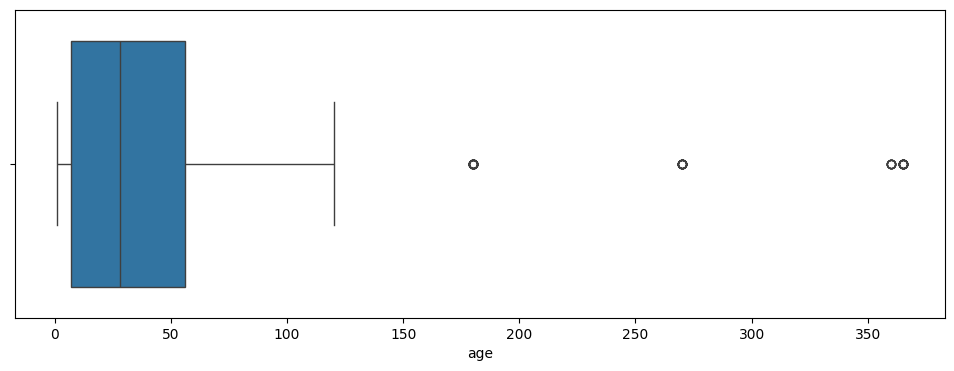

In [ ]:
plt.figure(figsize=(12,4))
sns.boxplot(x=df['age'])


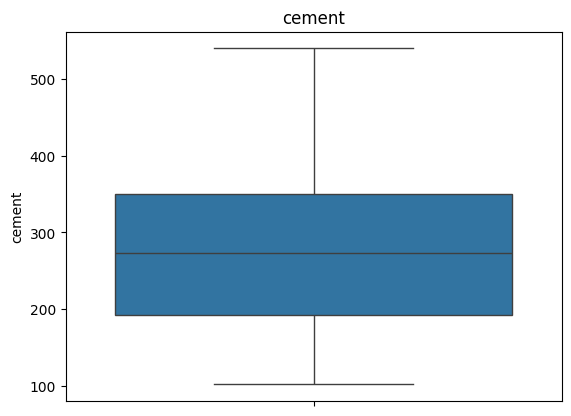

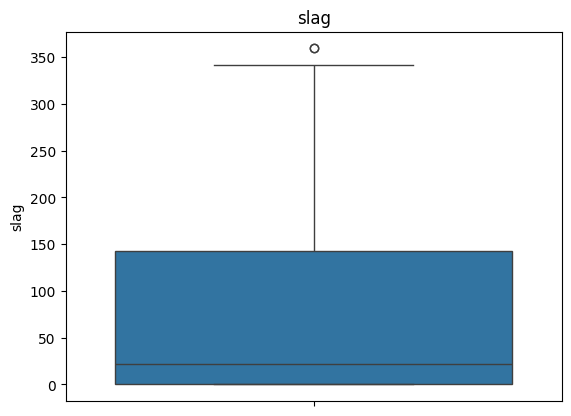

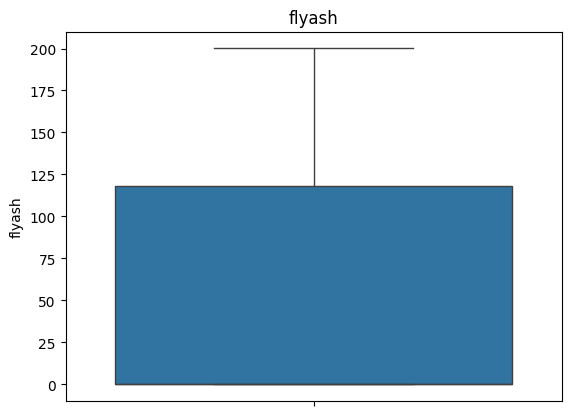

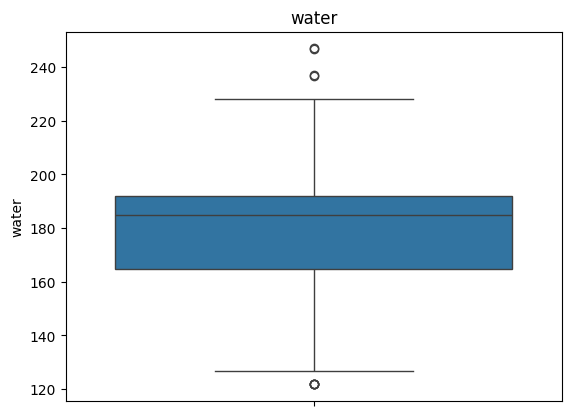

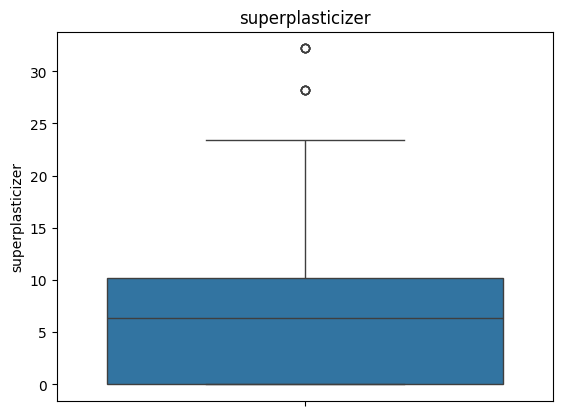

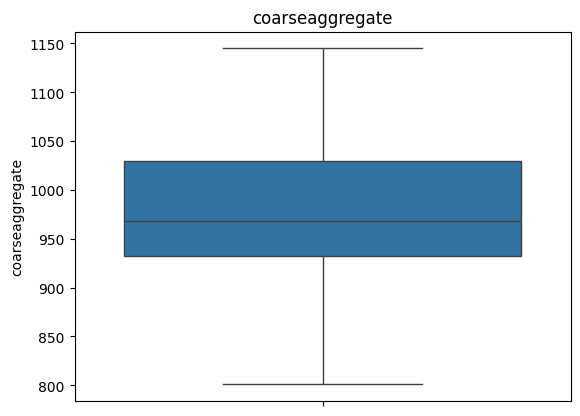

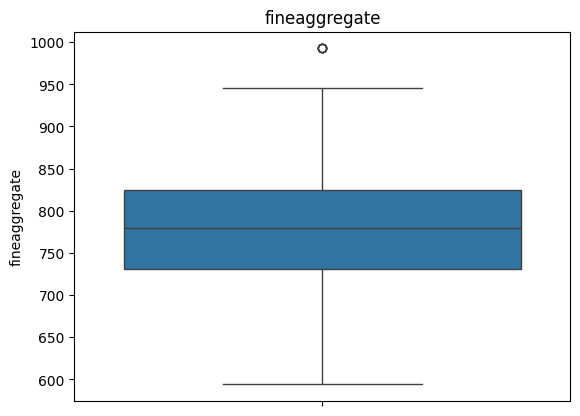

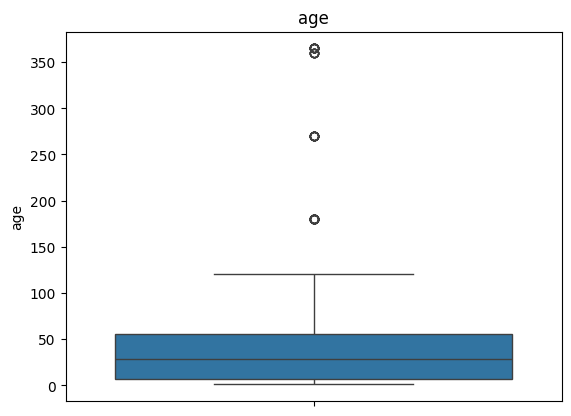

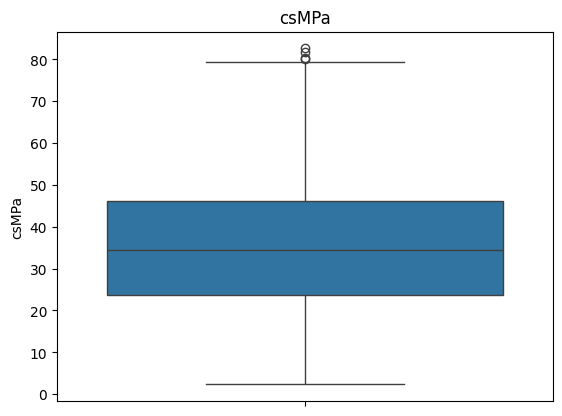

In [ ]:
for i in df.columns[0:]:
  sns.boxplot(df[i])
  plt.title(i)
  plt.show()

In [ ]:
columns_to_clean = df.columns[0:]

for col in columns_to_clean:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

print("DataFrame after removing outliers:")
display(df)

DataFrame after removing outliers:


,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
5,266.0,114.0,0.0,228.0,0.0,932.0,670.0,90,47.03
8,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
10,198.6,132.4,0.0,192.0,0.0,978.4,825.5,90,38.07
11,198.6,132.4,0.0,192.0,0.0,978.4,825.5,28,28.02
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


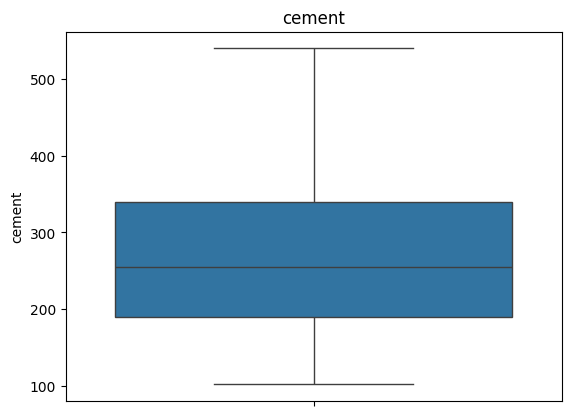

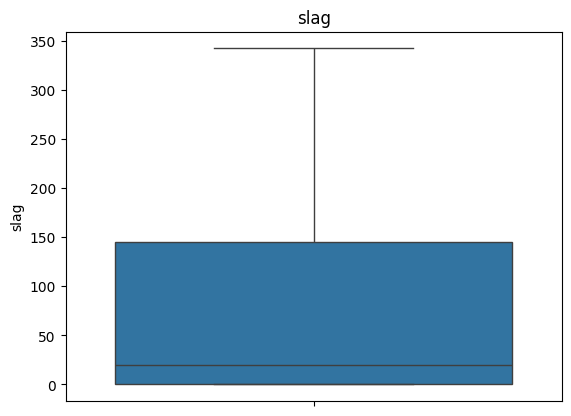

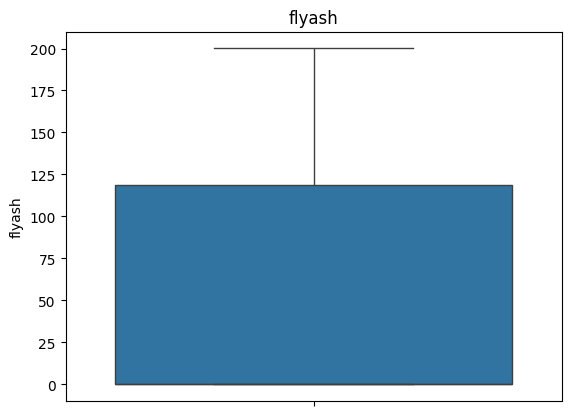

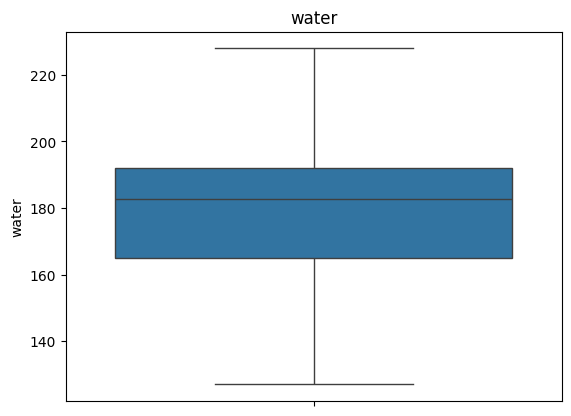

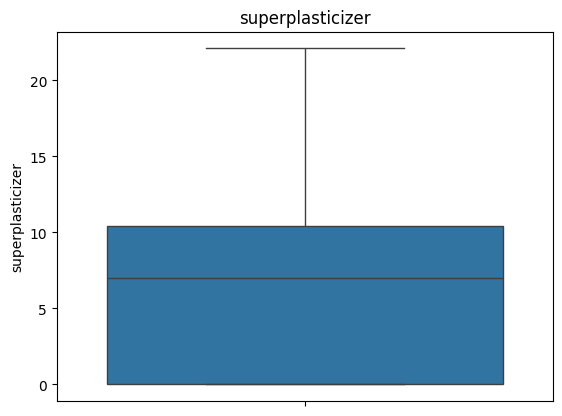

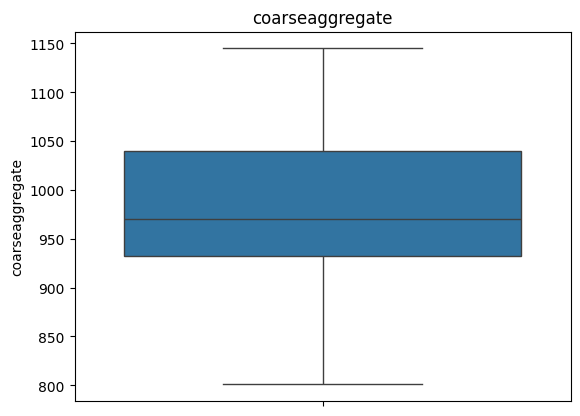

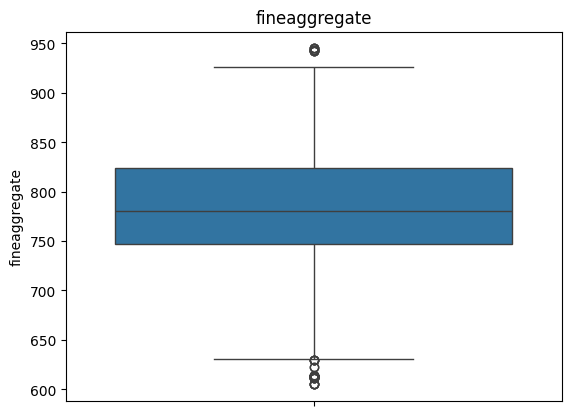

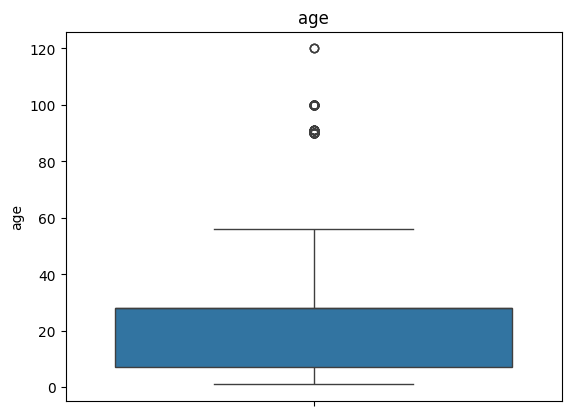

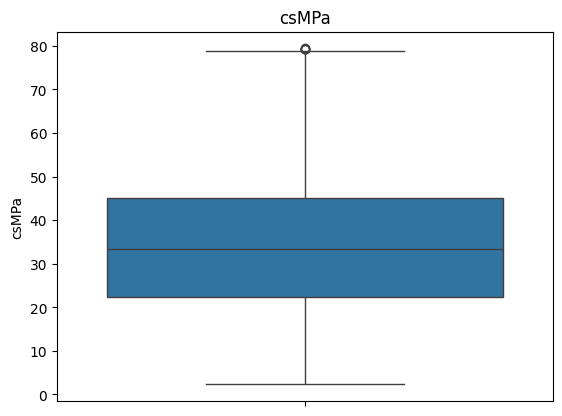

In [ ]:
for i in df.columns[0:]:
  sns.boxplot(df[i])
  plt.title(i)
  plt.show()

<Axes: >

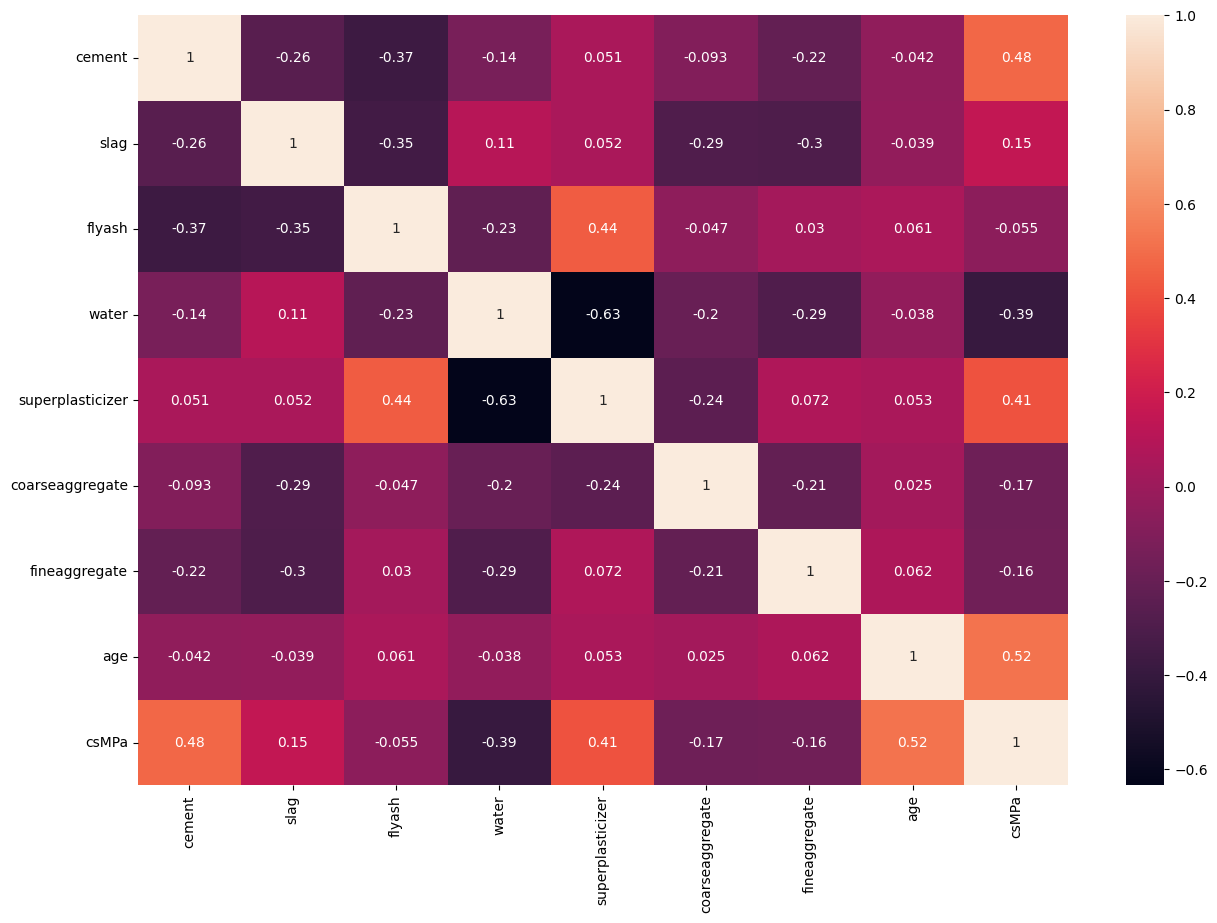

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(df[columns_to_clean].corr(),annot = True)

In [ ]:
x = df.drop('csMPa',axis=1)
y = df['csMPa']

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size = 0.2, random_state=42)


In [ ]:
model = XGBRegressor(n_estimators=100,learning_rate=0.1,max_depth=3,subsample=0.8,colsample_bytree=0.8)
model.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
y_pred=model.predict(x_test)

In [ ]:
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)

In [ ]:
mse

35.25390542568764

In [ ]:
r2

0.8927640496669135

In [ ]:
import pickle
with open('model.pkl','wb') as f:
  pickle.dump(model,f)